In [8]:
# Setup

import math
import numpy.linalg as linalg
import numpy as np
import matplotlib.pyplot as plt
import random
from typing import List
from sklearn.datasets import fetch_openml

import libraries.autodiff as autodiff

In [9]:
# Load MNIST dataset

mnist = fetch_openml(name='mnist_784', version=1)

images, labels = mnist.data, mnist.target

IMAGE_DIM: int = 28
DIGITS = 10

WRONG_ANSWER_VAL = 0
RIGHT_ANSWER_VAL = 1

def get_output_for_digit(digit: int) -> np.ndarray:
    arr = [WRONG_ANSWER_VAL for i in range(0, DIGITS)]
    arr[digit] = RIGHT_ANSWER_VAL
    return np.array(arr)

def get_correct_digit(index: int) -> int:
    return int(labels[index])

def get_output_for_index(index: int) -> np.ndarray:
    return get_output_for_digit(get_correct_digit(index))

TOTAL_TRAINING_CASES = 70000
MAX_VAL = 256

datas = []
for i in range(0, TOTAL_TRAINING_CASES):
    datas.append((np.array([v / MAX_VAL for v in images.iloc[i].values]).reshape((IMAGE_DIM, IMAGE_DIM)), get_output_for_digit(get_correct_digit(i))))

In [34]:
TRAINING_CASES = 50000
VALIDATION_CASES = 10000
TRAINING_ITERATIONS = 3
BATCH_SIZE = 1000

training_cases = datas[:TRAINING_CASES]
validation_cases = datas[-VALIDATION_CASES:]

def run_training(network: autodiff.NeuralNetwork, batch_size=BATCH_SIZE, verbose=True):
    correct_portion = []
    for j in range(0, TRAINING_ITERATIONS):
        random.shuffle(training_cases)
        for i in range(0, len(training_cases), batch_size):
            batch_in = [d[0].reshape((IMAGE_DIM*IMAGE_DIM, 1)) for d in training_cases[i:i+batch_size]]
            batch_out = [d[1] for d in training_cases[i:i+batch_size]]
            network.train_batch(batch_in, batch_out)
        #print(np.linalg.norm(network.current_parameters))

        total_correct = 0
        for i in range(0, len(validation_cases)):
            image = validation_cases[i][0]

            result_raw = network.forwards(image)
            result = np.argmax(result_raw)
            
            if result == np.argmax(validation_cases[i][1]):
                total_correct += 1

        correct_portion.append(total_correct / len(validation_cases))
        if verbose:
            print(str(total_correct / len(validation_cases) * 100) + '% correct')

    return correct_portion

### Linear Model

In [35]:
LEARNING_RATE = 0.00001
WEIGHT_DECAY_RATE = 1000
WEIGHT_DECAY_EXP = 2
LAYERS = [autodiff.SimpleLayer(DIGITS, activation_type=autodiff.ActivationFunction.NONE, init_type=autodiff.InitializationType.NORMAL)]
network: autodiff.NeuralNetwork = autodiff.NeuralNetwork((IMAGE_DIM*IMAGE_DIM,1), LAYERS, LEARNING_RATE, WEIGHT_DECAY_RATE, WEIGHT_DECAY_EXP)

#network.check(np.array([d[0].reshape((IMAGE_DIM*IMAGE_DIM, 1)) for d in training_cases[0:1]]))

#correct_portion = run_training(network)

In [22]:
LEARNING_RATES = 10**np.linspace(-6, 0, 10)
WEIGHT_DECAY_RATES = 10**np.linspace(0, 5, 20)
BATCH_SIZES = 10**np.linspace(0, 4.5, 10)
TRAINING_CASE_COUNTS = range(5000,50000+1,5000)

results = []
for test_case_count in TRAINING_CASE_COUNTS:
    for learning_rate in LEARNING_RATES:
        for weight_decay_rate in WEIGHT_DECAY_RATES:
            for batch_size in BATCH_SIZES:
                training_cases = datas[:test_case_count]
                network: autodiff.NeuralNetwork = autodiff.NeuralNetwork((IMAGE_DIM*IMAGE_DIM,1), LAYERS, learning_rate, weight_decay_rate, WEIGHT_DECAY_EXP)
                correct_portion = run_training(network, int(batch_size), False)
                results.append((learning_rate, weight_decay_rate, batch_size, test_case_count, correct_portion))
                print((learning_rate, weight_decay_rate, batch_size, test_case_count, correct_portion))


(1e-06, 1.0, 1.0, 5000, [0.0741, 0.0772, 0.0801])
(1e-06, 1.0, 3.1622776601683795, 5000, [0.0788, 0.0771, 0.0752])
(1e-06, 1.0, 10.0, 5000, [0.0986, 0.0998, 0.0995])
(1e-06, 1.0, 31.622776601683793, 5000, [0.1022, 0.1021, 0.1022])
(1e-06, 1.0, 100.0, 5000, [0.1254, 0.1255, 0.1255])
(1e-06, 1.0, 316.22776601683796, 5000, [0.1031, 0.1031, 0.1031])
(1e-06, 1.0, 1000.0, 5000, [0.0676, 0.0676, 0.0676])
(1e-06, 1.0, 3162.2776601683795, 5000, [0.1032, 0.1033, 0.1033])
(1e-06, 1.0, 10000.0, 5000, [0.1074, 0.1074, 0.1074])
(1e-06, 1.0, 31622.776601683792, 5000, [0.0697, 0.0697, 0.0697])
(1e-06, 1.8329807108324359, 1.0, 5000, [0.0921, 0.096, 0.098])
(1e-06, 1.8329807108324359, 3.1622776601683795, 5000, [0.0951, 0.0928, 0.0906])
(1e-06, 1.8329807108324359, 10.0, 5000, [0.1123, 0.1122, 0.1123])
(1e-06, 1.8329807108324359, 31.622776601683793, 5000, [0.0605, 0.0606, 0.0608])
(1e-06, 1.8329807108324359, 100.0, 5000, [0.1221, 0.1222, 0.1221])
(1e-06, 1.8329807108324359, 316.22776601683796, 5000, [0.07

c:\Users\ryan_\OneDrive\Documents\Python\Neural-Networks-from-Nothing\advanced_autodiff\experiments\libraries\autodiff.py:370: RuntimeWarning: overflow encountered in scalar multiply
  return self.scalar * self.sources[0].result
c:\Users\ryan_\OneDrive\Documents\Python\Neural-Networks-from-Nothing\advanced_autodiff\experiments\libraries\autodiff.py:582: RuntimeWarning: overflow encountered in scalar add
  return sum(self.sources[0].result)
c:\Users\ryan_\OneDrive\Documents\Python\Neural-Networks-from-Nothing\advanced_autodiff\experiments\libraries\autodiff.py:503: RuntimeWarning: overflow encountered in power
  return np.power(self.sources[0].result, self.exponent)
c:\Users\ryan_\OneDrive\Documents\Python\Neural-Networks-from-Nothing\advanced_autodiff\experiments\libraries\autodiff.py:526: RuntimeWarning: overflow encountered in matmul
  self.sources[1].grad += self.sources[0].get_result_matrix().transpose() @ self.grad
c:\Users\ryan_\OneDrive\Documents\Python\Neural-Networks-from-Noth

(2.1544346900318823e-05, 100000.0, 1.0, 5000, [0.098, 0.098, 0.098])


c:\Users\ryan_\OneDrive\Documents\Python\Neural-Networks-from-Nothing\advanced_autodiff\experiments\libraries\autodiff.py:865: RuntimeWarning: overflow encountered in add
  total_grads += grads


(2.1544346900318823e-05, 100000.0, 3.1622776601683795, 5000, [0.0844, 0.0936, 0.098])
(2.1544346900318823e-05, 100000.0, 10.0, 5000, [0.1256, 0.1195, 0.1137])
(2.1544346900318823e-05, 100000.0, 31.622776601683793, 5000, [0.076, 0.0769, 0.081])
(2.1544346900318823e-05, 100000.0, 100.0, 5000, [0.1177, 0.1163, 0.1156])
(2.1544346900318823e-05, 100000.0, 316.22776601683796, 5000, [0.1396, 0.1397, 0.1397])
(2.1544346900318823e-05, 100000.0, 1000.0, 5000, [0.1621, 0.1101, 0.1616])
(2.1544346900318823e-05, 100000.0, 3162.2776601683795, 5000, [0.1506, 0.1504, 0.1504])
(2.1544346900318823e-05, 100000.0, 10000.0, 5000, [0.1001, 0.0898, 0.1002])
(2.1544346900318823e-05, 100000.0, 31622.776601683792, 5000, [0.0899, 0.0575, 0.0898])
(0.0001, 1.0, 1.0, 5000, [0.1259, 0.1377, 0.1835])
(0.0001, 1.0, 3.1622776601683795, 5000, [0.0848, 0.0997, 0.1094])
(0.0001, 1.0, 10.0, 5000, [0.1109, 0.1124, 0.1143])
(0.0001, 1.0, 31.622776601683793, 5000, [0.0641, 0.0655, 0.0643])
(0.0001, 1.0, 100.0, 5000, [0.111, 

c:\Users\ryan_\OneDrive\Documents\Python\Neural-Networks-from-Nothing\advanced_autodiff\experiments\libraries\autodiff.py:525: RuntimeWarning: invalid value encountered in add
  self.sources[0].grad += np.outer(self.grad, self.sources[1].get_result_matrix()).flatten()


(0.0001, 29763.51441631319, 1.0, 5000, [0.098, 0.098, 0.098])
(0.0001, 29763.51441631319, 3.1622776601683795, 5000, [0.098, 0.098, 0.098])
(0.0001, 29763.51441631319, 10.0, 5000, [0.1105, 0.1041, 0.098])
(0.0001, 29763.51441631319, 31.622776601683793, 5000, [0.1165, 0.1154, 0.1123])
(0.0001, 29763.51441631319, 100.0, 5000, [0.1179, 0.1174, 0.1157])
(0.0001, 29763.51441631319, 316.22776601683796, 5000, [0.0453, 0.0451, 0.0452])
(0.0001, 29763.51441631319, 1000.0, 5000, [0.1011, 0.1353, 0.1015])
(0.0001, 29763.51441631319, 3162.2776601683795, 5000, [0.0854, 0.0855, 0.0855])
(0.0001, 29763.51441631319, 10000.0, 5000, [0.0929, 0.0961, 0.0932])
(0.0001, 29763.51441631319, 31622.776601683792, 5000, [0.1067, 0.1201, 0.1068])
(0.0001, 54555.947811685146, 1.0, 5000, [0.098, 0.098, 0.098])
(0.0001, 54555.947811685146, 3.1622776601683795, 5000, [0.098, 0.098, 0.098])
(0.0001, 54555.947811685146, 10.0, 5000, [0.098, 0.098, 0.098])
(0.0001, 54555.947811685146, 31.622776601683793, 5000, [0.1226, 0.1

c:\Users\ryan_\OneDrive\Documents\Python\Neural-Networks-from-Nothing\advanced_autodiff\experiments\libraries\autodiff.py:525: RuntimeWarning: overflow encountered in add
  self.sources[0].grad += np.outer(self.grad, self.sources[1].get_result_matrix()).flatten()


(0.00046415888336127773, 8858.667904100823, 1.0, 5000, [0.098, 0.098, 0.098])
(0.00046415888336127773, 8858.667904100823, 3.1622776601683795, 5000, [0.098, 0.098, 0.098])
(0.00046415888336127773, 8858.667904100823, 10.0, 5000, [0.1135, 0.098, 0.098])
(0.00046415888336127773, 8858.667904100823, 31.622776601683793, 5000, [0.0853, 0.0892, 0.0892])
(0.00046415888336127773, 8858.667904100823, 100.0, 5000, [0.0702, 0.0676, 0.0661])
(0.00046415888336127773, 8858.667904100823, 316.22776601683796, 5000, [0.1385, 0.1381, 0.1356])
(0.00046415888336127773, 8858.667904100823, 1000.0, 5000, [0.1098, 0.1252, 0.1075])
(0.00046415888336127773, 8858.667904100823, 3162.2776601683795, 5000, [0.0862, 0.0861, 0.0867])
(0.00046415888336127773, 8858.667904100823, 10000.0, 5000, [0.1562, 0.0726, 0.1564])
(0.00046415888336127773, 8858.667904100823, 31622.776601683792, 5000, [0.073, 0.1128, 0.073])
(0.00046415888336127773, 16237.76739188721, 1.0, 5000, [0.098, 0.098, 0.098])
(0.00046415888336127773, 16237.767391

c:\Users\ryan_\OneDrive\Documents\Python\Neural-Networks-from-Nothing\advanced_autodiff\experiments\libraries\autodiff.py:392: RuntimeWarning: overflow encountered in add
  self.sources[1].grad += self.grad


(0.002154434690031882, 2636.650898730358, 3.1622776601683795, 5000, [0.098, 0.098, 0.098])
(0.002154434690031882, 2636.650898730358, 10.0, 5000, [0.098, 0.098, 0.098])
(0.002154434690031882, 2636.650898730358, 31.622776601683793, 5000, [0.0892, 0.0892, 0.098])
(0.002154434690031882, 2636.650898730358, 100.0, 5000, [0.086, 0.091, 0.0958])
(0.002154434690031882, 2636.650898730358, 316.22776601683796, 5000, [0.1215, 0.1147, 0.1059])
(0.002154434690031882, 2636.650898730358, 1000.0, 5000, [0.0757, 0.1172, 0.0763])
(0.002154434690031882, 2636.650898730358, 3162.2776601683795, 5000, [0.1215, 0.1223, 0.1231])
(0.002154434690031882, 2636.650898730358, 10000.0, 5000, [0.0621, 0.1749, 0.0624])
(0.002154434690031882, 2636.650898730358, 31622.776601683792, 5000, [0.1016, 0.0908, 0.1017])
(0.002154434690031882, 4832.930238571752, 1.0, 5000, [0.098, 0.098, 0.098])
(0.002154434690031882, 4832.930238571752, 3.1622776601683795, 5000, [0.098, 0.098, 0.098])
(0.002154434690031882, 4832.930238571752, 10.0

c:\Users\ryan_\OneDrive\Documents\Python\Neural-Networks-from-Nothing\advanced_autodiff\experiments\libraries\autodiff.py:392: RuntimeWarning: invalid value encountered in add
  self.sources[1].grad += self.grad


(0.002154434690031882, 100000.0, 100.0, 5000, [0.066, 0.0659, 0.098])
(0.002154434690031882, 100000.0, 316.22776601683796, 5000, [0.0822, 0.0822, 0.0822])
(0.002154434690031882, 100000.0, 1000.0, 5000, [0.0722, 0.1614, 0.0722])
(0.002154434690031882, 100000.0, 3162.2776601683795, 5000, [0.1529, 0.1529, 0.1529])
(0.002154434690031882, 100000.0, 10000.0, 5000, [0.0889, 0.1037, 0.0891])
(0.002154434690031882, 100000.0, 31622.776601683792, 5000, [0.1123, 0.0764, 0.1121])
(0.01, 1.0, 1.0, 5000, [0.4242, 0.47, 0.5292])
(0.01, 1.0, 3.1622776601683795, 5000, [0.6743, 0.6579, 0.6923])
(0.01, 1.0, 10.0, 5000, [0.7687, 0.7791, 0.7693])
(0.01, 1.0, 31.622776601683793, 5000, [0.1913, 0.6742, 0.789])
(0.01, 1.0, 100.0, 5000, [0.1137, 0.1473, 0.1951])
(0.01, 1.0, 316.22776601683796, 5000, [0.0919, 0.0982, 0.1018])
(0.01, 1.0, 1000.0, 5000, [0.0922, 0.0893, 0.091])
(0.01, 1.0, 3162.2776601683795, 5000, [0.0911, 0.0858, 0.0844])
(0.01, 1.0, 10000.0, 5000, [0.1215, 0.1197, 0.1215])
(0.01, 1.0, 31622.776

c:\Users\ryan_\OneDrive\Documents\Python\Neural-Networks-from-Nothing\advanced_autodiff\experiments\libraries\autodiff.py:388: RuntimeWarning: overflow encountered in scalar add
  return self.sources[0].result + self.sources[1].result


(0.01, 233.57214690901213, 1.0, 5000, [0.098, 0.098, 0.098])
(0.01, 233.57214690901213, 3.1622776601683795, 5000, [0.098, 0.098, 0.098])
(0.01, 233.57214690901213, 10.0, 5000, [0.1135, 0.1135, 0.098])
(0.01, 233.57214690901213, 31.622776601683793, 5000, [0.1009, 0.1009, 0.1009])
(0.01, 233.57214690901213, 100.0, 5000, [0.1032, 0.1032, 0.1032])
(0.01, 233.57214690901213, 316.22776601683796, 5000, [0.0958, 0.0958, 0.0958])
(0.01, 233.57214690901213, 1000.0, 5000, [0.0764, 0.0958, 0.0854])
(0.01, 233.57214690901213, 3162.2776601683795, 5000, [0.1086, 0.1042, 0.1069])
(0.01, 233.57214690901213, 10000.0, 5000, [0.087, 0.0711, 0.1])
(0.01, 233.57214690901213, 31622.776601683792, 5000, [0.0676, 0.0615, 0.0801])
(0.01, 428.1332398719391, 1.0, 5000, [0.098, 0.098, 0.098])
(0.01, 428.1332398719391, 3.1622776601683795, 5000, [0.098, 0.098, 0.098])
(0.01, 428.1332398719391, 10.0, 5000, [0.1009, 0.098, 0.098])
(0.01, 428.1332398719391, 31.622776601683793, 5000, [0.1032, 0.1032, 0.1032])
(0.01, 428.

c:\Users\ryan_\OneDrive\Documents\Python\Neural-Networks-from-Nothing\advanced_autodiff\experiments\libraries\autodiff.py:522: RuntimeWarning: overflow encountered in matmul
  return (self.sources[0].get_result_matrix() @ self.sources[1].get_result_matrix()).flatten()


(0.046415888336127725, 1.8329807108324359, 1.0, 5000, [0.0982, 0.098, 0.098])
(0.046415888336127725, 1.8329807108324359, 3.1622776601683795, 5000, [0.1147, 0.2009, 0.1295])
(0.046415888336127725, 1.8329807108324359, 10.0, 5000, [0.4012, 0.2721, 0.3331])
(0.046415888336127725, 1.8329807108324359, 31.622776601683793, 5000, [0.4757, 0.306, 0.4912])
(0.046415888336127725, 1.8329807108324359, 100.0, 5000, [0.6287, 0.6679, 0.6303])
(0.046415888336127725, 1.8329807108324359, 316.22776601683796, 5000, [0.1049, 0.3952, 0.7329])
(0.046415888336127725, 1.8329807108324359, 1000.0, 5000, [0.1059, 0.1403, 0.1365])
(0.046415888336127725, 1.8329807108324359, 3162.2776601683795, 5000, [0.094, 0.1023, 0.1072])
(0.046415888336127725, 1.8329807108324359, 10000.0, 5000, [0.1101, 0.1012, 0.1157])
(0.046415888336127725, 1.8329807108324359, 31622.776601683792, 5000, [0.1328, 0.0878, 0.1311])
(0.046415888336127725, 3.3598182862837818, 1.0, 5000, [0.0949, 0.098, 0.098])
(0.046415888336127725, 3.3598182862837818

c:\Users\ryan_\OneDrive\Documents\Python\Neural-Networks-from-Nothing\advanced_autodiff\experiments\libraries\autodiff.py:388: RuntimeWarning: overflow encountered in add
  return self.sources[0].result + self.sources[1].result


(0.046415888336127725, 69.51927961775606, 1.0, 5000, [0.098, 0.098, 0.098])
(0.046415888336127725, 69.51927961775606, 3.1622776601683795, 5000, [0.098, 0.098, 0.098])
(0.046415888336127725, 69.51927961775606, 10.0, 5000, [0.0974, 0.098, 0.098])
(0.046415888336127725, 69.51927961775606, 31.622776601683793, 5000, [0.098, 0.098, 0.098])
(0.046415888336127725, 69.51927961775606, 100.0, 5000, [0.1028, 0.1028, 0.1028])
(0.046415888336127725, 69.51927961775606, 316.22776601683796, 5000, [0.1028, 0.1028, 0.1028])
(0.046415888336127725, 69.51927961775606, 1000.0, 5000, [0.1015, 0.0982, 0.1009])
(0.046415888336127725, 69.51927961775606, 3162.2776601683795, 5000, [0.1013, 0.098, 0.098])
(0.046415888336127725, 69.51927961775606, 10000.0, 5000, [0.071, 0.1014, 0.1011])
(0.046415888336127725, 69.51927961775606, 31622.776601683792, 5000, [0.1284, 0.0588, 0.1135])
(0.046415888336127725, 127.42749857031335, 1.0, 5000, [0.098, 0.098, 0.098])
(0.046415888336127725, 127.42749857031335, 3.1622776601683795,

c:\Users\ryan_\OneDrive\Documents\Python\Neural-Networks-from-Nothing\advanced_autodiff\experiments\libraries\autodiff.py:865: RuntimeWarning: invalid value encountered in add
  total_grads += grads


(1.0, 1438.449888287663, 10.0, 5000, [0.098, 0.098, 0.098])
(1.0, 1438.449888287663, 31.622776601683793, 5000, [0.098, 0.098, 0.098])
(1.0, 1438.449888287663, 100.0, 5000, [0.1062, 0.098, 0.098])
(1.0, 1438.449888287663, 316.22776601683796, 5000, [0.1413, 0.1455, 0.1278])
(1.0, 1438.449888287663, 1000.0, 5000, [0.0475, 0.1314, 0.0497])
(1.0, 1438.449888287663, 3162.2776601683795, 5000, [0.0661, 0.0656, 0.0662])
(1.0, 1438.449888287663, 10000.0, 5000, [0.0844, 0.1359, 0.0864])
(1.0, 1438.449888287663, 31622.776601683792, 5000, [0.0733, 0.1152, 0.0732])
(1.0, 2636.650898730358, 1.0, 5000, [0.098, 0.098, 0.098])
(1.0, 2636.650898730358, 3.1622776601683795, 5000, [0.098, 0.098, 0.098])
(1.0, 2636.650898730358, 10.0, 5000, [0.098, 0.098, 0.098])
(1.0, 2636.650898730358, 31.622776601683793, 5000, [0.098, 0.098, 0.098])
(1.0, 2636.650898730358, 100.0, 5000, [0.0872, 0.098, 0.098])
(1.0, 2636.650898730358, 316.22776601683796, 5000, [0.0387, 0.0343, 0.0316])
(1.0, 2636.650898730358, 1000.0, 500

KeyboardInterrupt: 

In [36]:
import pickle

with open("grid_search_bests.pickle", "wb+") as file:
    pickle.dump(results, file)

In [38]:
print(np.argmax([np.max(np.array(result[4])) for result in results]))
print(results[np.argmax([np.max(np.array(result[4])) for result in results])])
best_result = results[np.argmax([np.max(np.array(result[4])) for result in results])]

test_case_count = best_result[3]
learning_rate = best_result[0]
weight_decay_rate = best_result[1]
batch_size = best_result[2]
TRAINING_ITERATIONS = 100

training_cases = datas[:test_case_count]
network: autodiff.NeuralNetwork = autodiff.NeuralNetwork((IMAGE_DIM*IMAGE_DIM,1), LAYERS, learning_rate, weight_decay_rate, WEIGHT_DECAY_EXP)
correct_portion = run_training(network, int(batch_size))

1213
(0.01, 1.8329807108324359, 31.622776601683793, 5000, [0.4661, 0.7295, 0.8054])
46.47% correct
77.27000000000001% correct
79.65% correct
77.42999999999999% correct
75.88000000000001% correct
79.29% correct
79.55% correct
75.03999999999999% correct
74.05000000000001% correct
76.9% correct
77.37% correct
72.63% correct
76.94% correct


KeyboardInterrupt: 

In [39]:
print(results[np.argmax([np.max(np.array(result[4])) - np.min(np.array(result[4])) for result in results])])
best_result = results[np.argmax([np.max(np.array(result[4])) - np.min(np.array(result[4])) for result in results])]

test_case_count = best_result[3]
learning_rate = best_result[0]
weight_decay_rate = best_result[1]
batch_size = best_result[2]
TRAINING_ITERATIONS = 100

training_cases = datas[:test_case_count]
network: autodiff.NeuralNetwork = autodiff.NeuralNetwork((IMAGE_DIM*IMAGE_DIM,1), LAYERS, learning_rate, weight_decay_rate, WEIGHT_DECAY_EXP)
correct_portion = run_training(network, int(batch_size))

(0.00046415888336127773, 11.28837891684689, 10.0, 5000, [0.0929, 0.5886, 0.7875])
16.72% correct
62.4% correct
73.96000000000001% correct
73.99% correct
71.82% correct
74.51% correct
71.87% correct
77.25% correct


KeyboardInterrupt: 

In [ ]:
LEARNING_RATE = 1
LAYERS = [autodiff.SimpleLayer(16, activation_type=autodiff.ActivationFunction.SIGMOID, init_type=autodiff.InitializationType.NORMAL),
            autodiff.SimpleLayer(16, activation_type=autodiff.ActivationFunction.SIGMOID, init_type=autodiff.InitializationType.NORMAL),
            autodiff.SimpleLayer(DIGITS, activation_type=autodiff.ActivationFunction.SIGMOID, init_type=autodiff.InitializationType.NORMAL)]
network: autodiff.NeuralNetwork = autodiff.NeuralNetwork((IMAGE_DIM*IMAGE_DIM,1), LAYERS, LEARNING_RATE)

correct_portion = run_training(network)

18.02% correct
22.96% correct
27.58% correct
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\ryan_\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ryan_\AppData\Local\Temp\ipykernel_4408\2226551055.py", line 7, in <module>
    correct_percentage = run_training(network)
                         ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ryan_\AppData\Local\Temp\ipykernel_4408\2224868627.py", line 16, in run_training
    network.train_batch(batch_in, batch_out)
  File "c:\Users\ryan_\OneDrive\Documents\Python\Neural-Networks-from-Nothing\advanced_autodiff\experiments\libraries\autodiff.py", line 823, in train_batch
    grads = self.cost.backwards_from_last_forwards()
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ryan_\OneDrive\Documents\Python\Neural-Networks-from-Nothing\advanced_autodiff\experiments\libraries\autodiff.py", line 809, in get_cost
  File "c:\Users\ryan_\OneDrive\Documen

(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, -20.0, '−20'),
  Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100')])

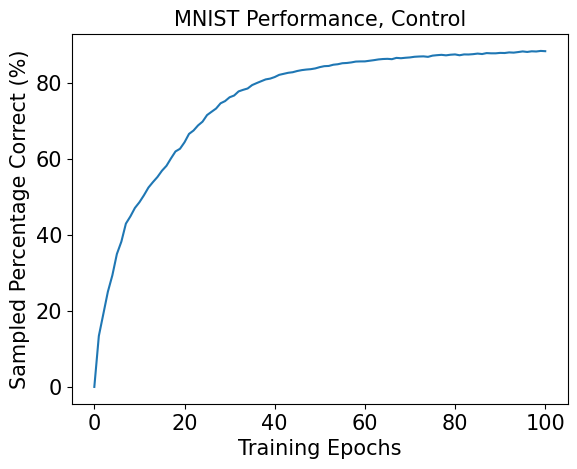

In [ ]:
import matplotlib.pyplot as plt

plt.plot(correct_portion, linewidth=3)
plt.xlabel('Training Epochs', fontsize=15)
plt.ylabel('Sampled Percentage Correct (%)', fontsize=15)
plt.title('MNIST Performance, Control', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [ ]:
import pickle

with open("control_mnist_performance.pickle", "wb") as file:
    pickle.dump(correct_portion, file)

In [ ]:
from libraries.autodiff import ActivationFunction as af
from libraries.autodiff import InitializationType as it

IMAGE_DIM: int = 28
DIGITS = 10

SHAPE_1 = (IMAGE_DIM, IMAGE_DIM)
STENCIL_1 = (5, 5)
STRIDE_1 = (1, 1) # no pooling!

SHAPE_2 = (SHAPE_1[0] - 4, SHAPE_1[1] - 4)
STENCIL_2 = (5, 5)
STRIDE_2 = (1, 1) # no pooling!

SHAPE_3 = (SHAPE_2[0] - 4, SHAPE_2[1] - 4)
STENCIL_3 = (5, 5)
STRIDE_3 = (1, 1) # no pooling!

SHAPE_4 = (SHAPE_3[0] - 4, SHAPE_3[1] - 4)
STENCIL_4 = (4, 4)
STRIDE_4 = (4, 4) # yes pooling!

SHAPE_5 = ((SHAPE_4[0] // 4) * (SHAPE_4[1] // 4), 1)

LEARNING_RATE = 1
LAYERS = [autodiff.ConvolutionLayer(SHAPE_1, STENCIL_1, STRIDE_1, activation_type=af.SIGMOID, init_type=it.NORMAL),
            autodiff.ConvolutionLayer(SHAPE_2, STENCIL_2, STRIDE_2, activation_type=af.SIGMOID, init_type=it.NORMAL),
            autodiff.ConvolutionLayer(SHAPE_3, STENCIL_3, STRIDE_3, activation_type=af.SIGMOID, init_type=it.NORMAL),
            autodiff.ConvolutionLayer(SHAPE_4, STENCIL_4, STRIDE_4, activation_type=af.SIGMOID, init_type=it.NORMAL),
            autodiff.ReshapeLayer(SHAPE_5),
            autodiff.SimpleLayer(DIGITS, activation_type=af.SIGMOID, init_type=it.NORMAL)]
network: autodiff.NeuralNetwork = autodiff.NeuralNetwork(SHAPE_1, LAYERS, LEARNING_RATE)

correct_portion = run_training(network)

15.629999999999999% correct
16.53% correct
18.8% correct
22.25% correct
24.81% correct
28.16% correct
30.520000000000003% correct
34.56% correct
36.95% correct
40.339999999999996% correct
43.05% correct
46.02% correct
48.07% correct
50.5% correct
52.559999999999995% correct
54.410000000000004% correct
55.95% correct
57.85% correct
60.12% correct
62.5% correct
64.37% correct
65.82000000000001% correct
67.19000000000001% correct
68.47% correct
69.89999999999999% correct
70.78999999999999% correct
71.36% correct
72.56% correct
73.74000000000001% correct
74.46000000000001% correct
74.92999999999999% correct
75.89% correct
75.6% correct
76.28% correct
76.84% correct
77.06% correct
77.49000000000001% correct
77.73% correct
78.03999999999999% correct
78.27% correct
78.53% correct
78.68% correct
78.92% correct
79.11% correct
79.08% correct
79.47% correct
79.59% correct
79.92% correct
79.89% correct
80.2% correct


KeyboardInterrupt: 